Imagine a group of students from different colleges taking the same exam. You want to see if one college outperforms the other, hence your null hypothesis is that the means of GPAs in each group are equivalent to those of the other groups. To keep it simple, we will consider 3 groups (college ‘A’, ‘B’, ‘C’) with 6 students each.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import DataFrame
a=[25,25,27,30,23,20]
b=[30,30,21,24,26,28]
c=[18,30,29,29,24,26]
list_of_tuples = list(zip(a, b,c))
df = pd.DataFrame(list_of_tuples, columns = ['A', 'B', 'C'])
df

,A,B,C
0,25,30,18
1,25,30,30
2,27,21,29
3,30,24,29
4,23,26,24
5,20,28,26


In [ ]:
m1=np.mean(a)
m2=np.mean(b)
m3=np.mean(c)

print('Average mark for college A: {}'.format(m1))
print('Average mark for college B: {}'.format(m2))
print('Average mark for college C: {}'.format(m3))

Average mark for college A: 25.0
Average mark for college B: 26.5
Average mark for college C: 26.0


In [ ]:
# Compute the overall mean
m=(m1+m2+m3)/3 
print('Overall mean: {}'.format(m)) 

Overall mean: 25.833333333333332


In [ ]:
# compute the ‘between-group’ sum of squared differences 
# (where n is the number of observations per group/college, hence in our case n=6)
SSb=6*((m1-m)**2+(m2-m)**2+(m3-m)**2)
print('Between-groups Sum of Squared Differences: {}'.format(SSb))

Between-groups Sum of Squared Differences: 6.999999999999999


In [ ]:
# Between-group MS value
MSb=SSb/2
print('Between-groups Mean Square value: {}'.format(MSb))

Between-groups Mean Square value: 3.4999999999999996


In [ ]:
# Within-group sum of squared differences
err_a=list(a-m1)
err_b=list(b-m2)
err_c=list(c-m3)
err=err_a+err_b+err_c
ssw=[]
for i in err:
    ssw.append(i**2)
    
SSw=np.sum(ssw)

print('Within-group Sum of Squared Differences: {}'.format(SSw))


Within-group Sum of Squared Differences: 223.5


In [ ]:
# Within-group mean squared value
MSw=SSw/15
print('Within-group Mean Squared value: {}'.format(MSw))

Within-group Mean Squared value: 14.9


In [ ]:
# Compute the F-score
F=MSb/MSw 
print('F-score: {}'.format(F)) 

F-score: 0.23489932885906037


In [ ]:
# F-score using scipy.stats
import scipy.stats as stats 
stats.f_oneway(a,b,c) 

F_onewayResult(statistic=0.2348993288590604, pvalue=0.793504662732833)

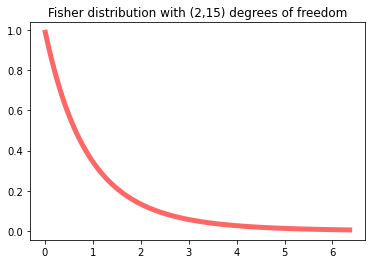

In [ ]:
from scipy.stats import f
fig, ax = plt.subplots(1, 1)
plt.title('Fisher distribution with (2,15) degrees of freedom')
dfn, dfd = 2,15
x = np.linspace(f.ppf(0.01, dfn, dfd),f.ppf(0.99, dfn, dfd), 100)
ax.plot(x, f.pdf(x, dfn, dfd),'r-', lw=5, alpha=0.6, label='f pdf')

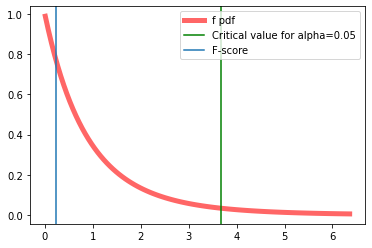

In [ ]:
# we set alpha, which the level of significance, equal to 5%. The corresponding F-critical value is 3.68. 
fig, ax = plt.subplots(1, 1)
dfn, dfd = 2,15
x = np.linspace(f.ppf(0.01, dfn, dfd),f.ppf(0.99, dfn, dfd), 100)
ax.plot(x, f.pdf(x, dfn, dfd),'r-', lw=5, alpha=0.6, label='f pdf')
plt.axvline(x=3.68, label='Critical value for alpha=0.05', color='g')
plt.axvline(x=F, label='F-score')
plt.legend()

We do not reject the Null hypothesis about equality among means. We can conclude (with an error of 5%, or alternatively, with a confidence of 95%) that there is no significant difference between our three colleges A, B and C.